### Zadanie 1
Napisz funkcję perceptron, która będzie realizowała obliczenia perceptronu z dwoma wejściami $x_1$ oraz $x_2$, z progową funkcją aktywacji. Jako wejście będzie przyjmowała wagi $w_1$, $w_2$ oraz wejścia $x_1,x_2 \in {0,1}$. Dobierz w sposób manualny wagi $w_1$, $w_2$ oraz $w_3$do problemu:

1. Operacji logicznej AND: 
    
    Przykład: parametryzacja postaci w1=0.2, w2=0,w3=0.1 nie jest dobra mimo, że dla x1=1 oraz dla x2=1 wartość x1AND x2 jest poprawna to już dla x1=0 oraz x2=1 wartość dalej wynosi 1, podczas gdy powinna 0.

| x1 | x2 | x1 and x2 |
|-:|-:|-:|
| 0 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

2. Operacji logicznej OR:

| x1 | x2 | x1 or x2 |
|-:|-:|-:|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 1 |

3. Czy podobnie uda się dobrać wagi dla problemu XOR? Odpowiedź uzasadnij.

| x1 | x2 | x1 xor x2 |
|-:|-:|-:|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |


In [2]:
def perceptron(w1, w2, w3, x1, x2):
   y = w1 * x1 + w2 * x2 + w3
   return 1 if y > 0 else 0

In [3]:
#AND

w1 = 1
w2 = 1
w3 = -1

print(perceptron(w1, w2, w3, 0, 0))
print(perceptron(w1, w2, w3, 0, 1))
print(perceptron(w1, w2, w3, 1, 0))
print(perceptron(w1, w2, w3, 1, 1))

0
0
0
1


In [4]:
#OR

w1 = 1
w2 = 1
w3 = 0

print(perceptron(w1, w2, w3, 0, 0))
print(perceptron(w1, w2, w3, 0, 1))
print(perceptron(w1, w2, w3, 1, 0))
print(perceptron(w1, w2, w3, 1, 1))

0
1
1
1


In [5]:
#XOR 

w1 = 1
w2 = 0
w3 = 0

print(perceptron(w1, w2, w3, 0, 0))
print(perceptron(w1, w2, w3, 0, 1))
print(perceptron(w1, w2, w3, 1, 0))
print(perceptron(w1, w2, w3, 1, 1))

0
0
1
1


Pojedynczy perceptron nie wystraczy aby poprawnie zrealizowac funkcję XOR. 

### Zadanie 2

Napisz procedurę **train_ann**, która na wyjściu zwróci krotkę zawierającą dwie wartości: w1 oraz w2, które odpowiednio oznaczają macierze wag pomiędzy warstwą wejściową a warstwą ukrytą oraz pomiędzy warstwą ukrytą a warstwą wyjściową. Jest to funkcja, której zadaniem jest trenowanie sieci w trybie batchowym. Należy pamiętać o:

1. Zainicjalizowaniu zmiennych odpowiedzialnych za przechowywanie macierzy w1 i w2 w sposób losowy (np. ze standardowego rozkładu normalnego poprzez np.random.randn.
2. W zmiennej it_nmb przechowujemy maksymalną liczbę iteracji (jest to brutalny warunek stopu nie odwołujący się do wniosków, które należałoby wyciągać wraz z kolejnymi iteracjami, ale dobry “na początek”)
3. Iterując się po od 0 do it_nmb należy wykonywać na przemian fazę FeedForward oraz fazę BackPropagation. Pierwsza z nich oblicza wyjście dla zbioru treningowego dla aktualnych wartości macierzy wag w1 oraz w2. Druga aktualizuje te wagi zgodnie z kierunkiem największego spadku. 
4. Skorzystaj ze zmiennych pomocniczych aby określić wymiarowość macierzy w1 i w2: nmb_of_inputs_in_w1, nmb_of_inputs_in_w2, nmb_of_outputs.
5. Implementacja funkcji compute_feed_forward oraz compute_backpropagation będzie przedmiotem kolejnych zadań. Możesz na razie zdefiniować pustą implementację tych funkcji zwracającą “None”.

In [6]:
def train_ann(x, y, hidden = 10, eta = 0.1, it_nmb = 10000):
    nmb_of_inputs_in_w1 = x.shape[1] + 1
    nmb_of_inputs_in_w2 = hidden + 1
    nmb_of_outputs = y.shape[1]
    
    w1 = np.random.randn(nmb_of_inputs_in_w1, hidden)
    w2 = np.random.randn(nmb_of_inputs_in_w2, nmb_of_outputs)
    
    for i in range(0,it_nmb):
        outputs = compute_feed_forward(x, w1, w2)
        new_w = compute_backpropagation(x, y, outputs[0], outputs[1], w1, w2, eta)
        w1 = new_w[0]
        w2 = new_w[1]
    return (w1, w2)


### Zadanie 3

W pierwszym kroku napisz procedurę **compute_feed_forward**, która na wyjściu zwróci listę zawierającą dwie wartości: *ou* oraz *oh*, które odpowiednio oznaczają wyjście neuronów z warstwy wyjściowej oraz wyjście z warstwy ukrytej.

W zadaniu wykorzystaj implementację funkcji sigmoid podaną poniżej

In [7]:
from numpy import exp

def sigmoid(x):
  return 1 / (1 + exp(-x))

In [8]:
def compute_feed_forward(x, w1, w2, activation_function = sigmoid):
    
    x = np.c_[x, np.repeat(1, x.shape[0])]
    oh = activation_function(x @ w1)
    
    oh_b = np.c_[oh, np.repeat(1, oh.shape[0])]
    ou = activation_function(oh_b @ w2)

    return (ou, oh)

### Zadanie 4

Zaimplementuj funkcję compute_backpropagation realizującą zadanie wstecznej propagacji. 

In [9]:
def compute_backpropagation(x, y, ou, oh, w1, w2, eta):
    delta_u = (ou * (1 - ou))*(y - ou)
    oh_b = np.c_[oh, np.repeat(1,oh.shape[0])]
    delta_h = (oh * (1 - oh)) * (delta_u @ w2[:-1].T)
    x_b = np.c_[x, np.repeat(1, x.shape[0])]
    
    w2 = w2 + oh_b.T @ delta_u * eta
    w1 = w1 + x_b.T @ delta_h * eta
    
    return (w1,w2)

### Zadanie 5

Zaimplementuj funkcję predict, której zadaniem jest dla zadanego zbioru przykładów (którego postać macierzowa jest identyczna jak zmiennej x wykorzystywanej do uczenia) obliczyć wartości zmiennej objaśnianej (czyli macierz/wektor postaci macierzowej identycznej jak zmiennej y wykorzystywanej do uczenia). 

In [10]:
def predict(x, model, activation_function = sigmoid):
    x = np.c_[x, np.repeat(1, x.shape[0])]
    h = activation_function(x @ model[0])
    h2 = np.c_[h, np.repeat(1, h.shape[0])]
    out = activation_function(h2 @ model[1])
    return np.array([1.0 if element >0.5 else 0.0 for element in out])

### Zadanie 6
Do dzieła! Teraz skoro mamy już w pełni działającą sieć neuronową możemy jej użyć! Najpierw sprawdźmy czy sieć nauczy się rozwiązywać problem koniunkcji logicznej: 


In [11]:
import numpy as np
x = np.array([[0,0],[1,0],[0,1],[1,1]])
y = np.array([[0],[0],[0],[1]])

model = train_ann(x,y)
print(predict(x, model))

print(model[0]) #w1
print(model[1]) #w2

[0. 0. 0. 1.]
[[-0.95755354 -0.56354849 -2.02622814 -1.93514617 -1.15097933 -1.04034465
   1.97981372  2.41066769  0.39561565 -0.74952944]
 [ 0.9758235  -1.03981545 -0.70503518 -1.86356042 -1.2711662  -0.36406043
   0.97955705  1.91012249 -3.27315701 -0.3516951 ]
 [ 1.39828928  0.53719213  1.28210056  2.38490061  1.03740353 -0.51003473
  -1.56568051 -2.81508729  0.66202074 -0.56247352]]
[[-0.17297951]
 [-1.63342061]
 [-2.03218963]
 [-3.90935441]
 [-2.52473763]
 [-0.62158154]
 [ 2.83686221]
 [ 4.43492034]
 [-2.81082218]
 [-1.06903282]
 [ 0.25968561]]


Zmień postać macierzy x oraz y tak aby nauczyć się problemu XOR z zadania 2. 

### Zadanie 7

Podobnie jak w zadaniu z SVM załaduj zbiór “cats”:

In [13]:
import pandas as pd

cats = pd.read_csv("cats.csv")

1. Zbuduj model dla tego zbioru z wykorzystaniem metod do trenowania sieci neuronowych z poprzedniego zadania. Konieczna będzie transformacja danych wejściowych:


In [14]:
x = cats.iloc[:,1:]
y = cats.iloc[:,0]

y.loc[y=="F"] = 1.0
y.loc[y=="M"] = 0.0

y = y.to_numpy().reshape(-1,1).astype(np.float16)
x = x.astype(np.float16)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Co zauważyłeś? Czy model, który otrzymałeś wykazuje zdolność uczenia z przedstawionych danych? 

In [18]:
model_cats = train_ann(x, y, hidden = 10, eta = 1.0, it_nmb = 1000)
predictions = predict(x, model_cats)

from sklearn import metrics

print(predictions)
print(metrics.confusion_matrix(y, predictions, labels = [1, 0]))
print(metrics.classification_report(y, predictions, labels = [1, 0]))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[ 0 47]
 [ 0 97]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        47
           0       0.67      1.00      0.80        97

    accuracy                           0.67       144
   macro avg       0.34      0.50      0.40       144
weighted avg       0.45      0.67      0.54       144



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Sieć nie poradziła sobie z zadaniem, w ogóle nie rozpoznaje Female.

2. Dokonaj przeskalowania danych zgodnie z poniższą formułą:

In [19]:
from sklearn import preprocessing

x_scaled = preprocessing.scale(x)

model_cats = train_ann(x_scaled, y, hidden = 10, eta = 1.0, it_nmb = 1000)
predictions = predict(x_scaled, model_cats)

from sklearn import metrics

print(predictions)
print(metrics.confusion_matrix(y, predictions, labels = [1, 0]))
print(metrics.classification_report(y, predictions, labels = [1, 0]))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:255: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  "Numerical issues were encountered "


[1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[29 18]
 [10 87]]
              precision    recall  f1-score   support

           1       0.74      0.62      0.67        47
           0       0.83      0.90      0.86        97

    accuracy                           0.81       144
   macro avg       0.79      0.76      0.77       144
weighted avg       0.80      0.81      0.80       144



Po przeskalowaniu sieć sobie lepiej radzi. Zwracane wartosci są zróżnicowane (1 i 0), a accuracy wysokie. Skalowanie pomogło ponieważ dane - masa serca i masa ciała - wejściowo były w różnych jednostkach g i kg. 

Co zaobserwowałeś? Jeśli skalowanie pomogło - to wyjaśnij dlaczego? 
Porównaj wyniki otrzymane z wynikami modelu SVM. Do rysowania krzywej decyzyjnej użyj zmodyfikowanej wersji funkcji plotCats z poprzedniego laboratorium:

In [21]:
import matplotlib.pyplot as plt 


def plotCats(X, Y, model):
    x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
    y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
    h = .02     
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    predictions = predict(np.c_[xx.ravel(), yy.ravel()], model)

    predictions = predictions.reshape(xx.shape)

    f, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contourf(xx, yy, predictions, 1, cmap="RdBu",
                      vmin=0, vmax=1)

    ax_c = f.colorbar(contour)
    ax_c.set_label("Decision class")

    ax.scatter(X[:,0], X[:,1], c=y, s=55,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="black", linewidth=1)

    ax.set(
       xlim=(x_min, x_max), ylim=(y_min, y_max),
       xlabel="Bwt", ylabel="Hwt")

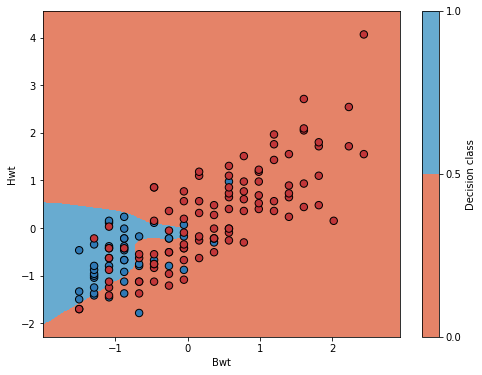

In [22]:
plotCats(x_scaled, y, model_cats)

3. Zastosuj skalowanie Min - Max i porównaj wyniki. 

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x)
x_minmax_scaled = scaler.transform(x)
x_minmax_scaled.std(axis=0)

array([0.2544, 0.1709], dtype=float16)